### Xoay ảnh (Rotation)

Xoay ảnh được hiểu là ta quay một bức ảnh theo một góc xác định quanh một điểm nào đó. Phép xoay sẽ không đảm bảo tính chất song song với các trục X hoặc Y như phép dịch chuyển nhưng nó sẽ bảo toàn độ lớn góc. Nếu 3 điểm bất kì tại ảnh gốc tạo thành một tam giác thì khi biến đổi qua phép xoay ảnh, chúng sẽ tạo thành một tam giác đồng dạng với tam giác ban đầu.
Phép xoay của một hình ảnh tương ứng với một góc $\theta$ đạt được bằng một ma trận dịch chuyển $\mathbf{M}$ như sau:

$$\mathbf{M} = \begin{bmatrix} cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)\end{bmatrix}$$

Ngoài ra OpenCV hỗ trợ một phép xoay phóng đại (scaled rotation) với khả năng vừa biến đổi ảnh theo phép xoay theo tâm xác định và điều chỉnh lại kích thước ảnh sau xoay. Như vậy bạn có thể xoay theo bất kì vùng nào mà bạn ưa chuộng hơn. Phép dịch chuyển ma trận được đưa ra như sau:

$$\begin{bmatrix} \alpha & \beta & (1-\alpha)c_x-\beta c_y \\
-\beta & \alpha & \beta c_x+(1-\alpha)c_y\end{bmatrix}$$

trong đó:

$$\alpha = scale.cos(\theta) \\
\beta = scale.sin(\theta)$$

$(c_x, c_y)$ là tọa độ tâm của phép xoay và $scale$ là độ phóng đại.

Để tìm ra ma trận transform có thể sử dụng hàm `cv2.getRotationMatrix2D()` của OpenCV. Trong hàm này chúng ta cần xác định tâm của phép xoay (đối số `center`), góc xoay (`angle`) và tham số phóng đại kích thước ảnh (`scale`).

Bên dưới là một ví dụ xoay ảnh -45 độ tại tâm của ảnh và giảm kích thước các chiều đi 1 nửa.

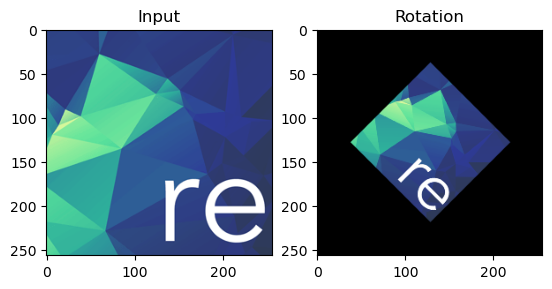

In [2]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np

def Show(image, name, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    
image = cv2.imread(r'd:\icon.png', cv2.IMREAD_COLOR)
(w, h, c) = image.shape

M = cv2.getRotationMatrix2D(center=(w/2, h/2), angle=-45, scale= 0.5)
img_rotation = cv2.warpAffine(image, M, (w, h))
# Hình vẽ có 1 hàng 2 cột, vẽ ở vị trí thứ 1
plt.subplot(121), Show(image, "Input")
# Hình vẽ có 1 hàng 2 cột, vẽ ở vị trí thứ 2
plt.subplot(122), Show(img_rotation, "Rotation")
plt.show()
